In [1]:
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import csv # read 
import numpy as np #linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [2]:
train = pd.read_csv('../dataset/train.csv', sep=',', na_values='.') #read csv file, seperated by ;, na values exists
test = pd.read_csv('../dataset/test.csv', sep=',', na_values='.')
train #show data

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739e+00,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144e+00
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,5.988956e-01,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,9.438769e-01,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,1.345191e-02,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472e+00
3,6,1,7.974146e-01,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,2.267384e-03,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483e+00
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
5,9,0,NaN,NaN,C,NaN,8.856791,NaN,NaN,0.359993,...,NaN,NaN,4.986116e-02,X,NaN,NaN,1.536222,0,NaN,NaN
6,12,0,8.998057e-01,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299,1.992594,8.375832e-02,BJ,3.276100,1.623298,2.266575,0,2.263736,9.708730e-01
7,21,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BY,NaN,NaN,NaN,0,NaN,NaN
8,22,0,2.078651e+00,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,...,8.148148,1.875560,1.865950e-02,S,1.159637,5.582865,1.105283,0,1.170731,3.333334e+00
9,23,1,1.144802e+00,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,...,7.325843,4.896617,8.943653e-03,E,1.344550,1.601176,1.928009,0,3.174603,1.000000e+00


In [3]:
"Check the shape of train and test data"
print('Train data size: '+str(train.shape)) #train shape
print('Test data size: '+str(test.shape)) #test shape

Train data size: (114321, 133)
Test data size: (114393, 132)


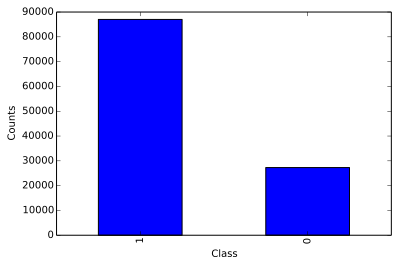

In [4]:
train.target.value_counts().plot.bar() #target variable
plt.xlabel('Class')
plt.ylabel('Counts')
plt.savefig('plot_de1.pdf')

In [5]:
test_numr =test.select_dtypes(include=[np.number])
test_char =test.select_dtypes(include=[np.object])
print("Numerical column count : {}".format(test_numr.shape[1]))
print("Category column count : {}".format(test_char.shape[1]))

Numerical column count : 113
Category column count : 19


In [6]:
train_numr =train.select_dtypes(include=[np.number])
train_char =train.select_dtypes(include=[np.object])
print("Numerical column count : {}".format(train_numr.shape[1]))
print("Category column count : {}".format(train_char.shape[1]))

Numerical column count : 114
Category column count : 19


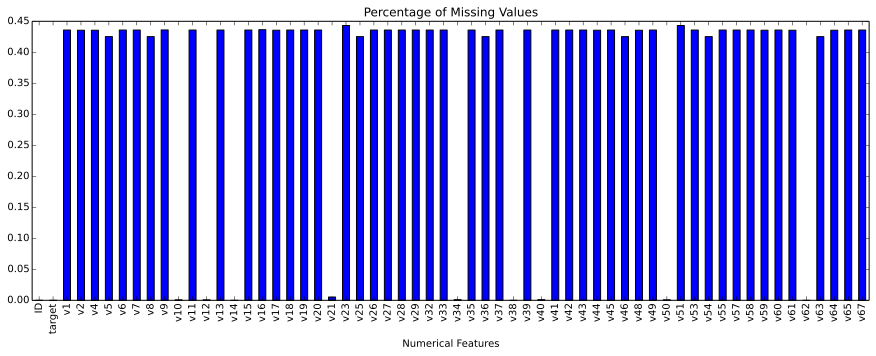

In [7]:
nullvalues = [float((train_numr[col].isnull().sum()))/len(train_numr[col])
              for col in train_numr.columns.values[0:60]]
percentagenull = list(zip(train_numr.columns.values[0:60], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["Numerical Features","percantage of missing value (train)"])
nullplot=nullplot.set_index("Numerical Features")
fig1 = nullplot.plot.bar(figsize =(15,5),title="Percentage of Missing Values", legend=False)
fig2 = fig1.get_figure()
fig2.savefig('plot_de2a.pdf')

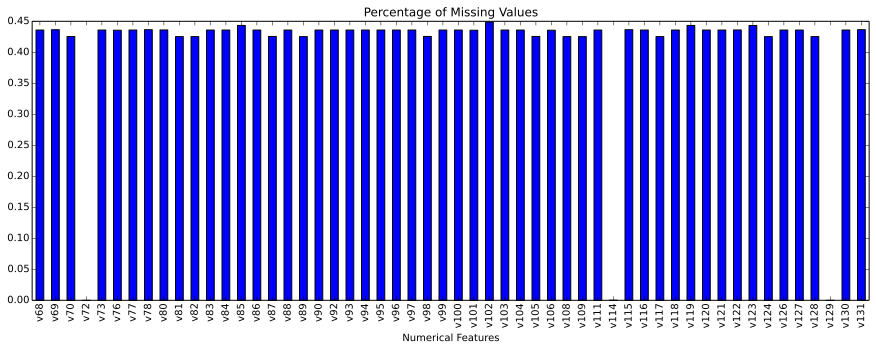

In [8]:
nullvalues = [float((train_numr[col].isnull().sum()))/len(train_numr[col])
              for col in train_numr.columns.values[60:]]
percentagenull = list(zip(train_numr.columns.values[60:], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["Numerical Features","percantage of missing value (train)"])
nullplot=nullplot.set_index("Numerical Features")
fig1 = nullplot.plot.bar(figsize =(15,5),title="Percentage of Missing Values", legend=False)
fig2 = fig1.get_figure()
fig2.savefig('plot_de2b.pdf')

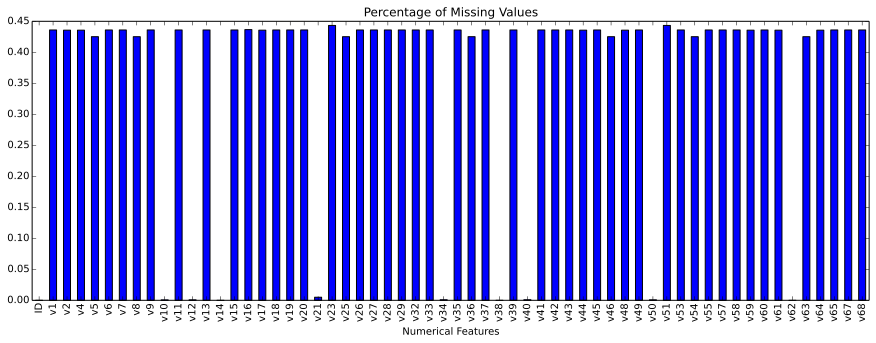

In [9]:
nullvalues = [float((test_numr[col].isnull().sum()))/len(test_numr[col])
              for col in test_numr.columns.values[0:60]]
percentagenull = list(zip(test_numr.columns.values[0:60], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["Numerical Features","percantage of missing value (train)"])
nullplot=nullplot.set_index("Numerical Features")
fig1 = nullplot.plot.bar(figsize =(15,5),title="Percentage of Missing Values", legend=False)
fig2 = fig1.get_figure()
fig2.savefig('plot_de3a.pdf')

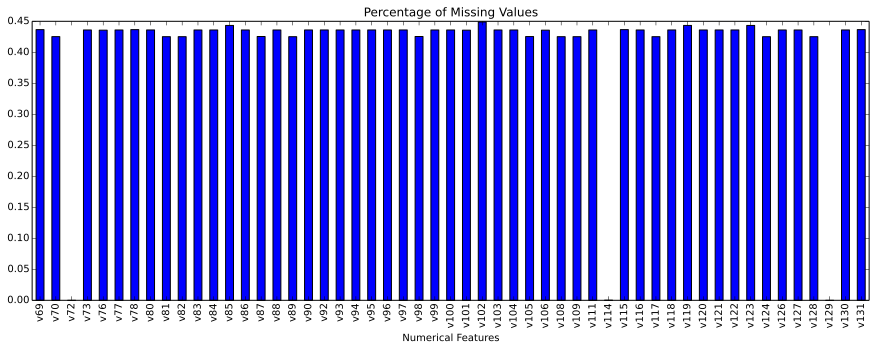

In [10]:
nullvalues = [float((test_numr[col].isnull().sum()))/len(test_numr[col])
              for col in test_numr.columns.values[60:]]
percentagenull = list(zip(test_numr.columns.values[60:], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["Numerical Features","percantage of missing value (train)"])
nullplot=nullplot.set_index("Numerical Features")
fig1 = nullplot.plot.bar(figsize =(15,5),title="Percentage of Missing Values", legend=False)
fig2 = fig1.get_figure()
fig2.savefig('plot_de3b.pdf')

In [11]:
"look at charcter features"
name=[]
value=[]
for col in  train_char:
    print(col+" : " +str(len(train_char[col].unique())))
    name.append(col)
    value.append(len(train_char[col].unique()))

v3 : 4
v22 : 18211
v24 : 5
v30 : 8
v31 : 4
v47 : 10
v52 : 13
v56 : 123
v66 : 3
v71 : 9
v74 : 3
v75 : 4
v79 : 18
v91 : 8
v107 : 8
v110 : 3
v112 : 23
v113 : 37
v125 : 91


In [12]:
pd.DataFrame.from_items([('total unique number', value)],
                           orient='index', columns=name)

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
total unique number,4,18211,5,8,4,10,13,123,3,9,3,4,18,8,8,3,23,37,91


In [13]:
"look at charcter features"
name=[]
value=[]
for col in  test_char:
    print(col+" : " +str(len(test_char[col].unique())))
    name.append(col)
    value.append(len(test_char[col].unique()))

v3 : 4
v22 : 18253
v24 : 5
v30 : 8
v31 : 4
v47 : 9
v52 : 13
v56 : 117
v66 : 3
v71 : 9
v74 : 3
v75 : 4
v79 : 17
v91 : 8
v107 : 8
v110 : 3
v112 : 23
v113 : 37
v125 : 91


In [14]:
pd.DataFrame.from_items([('total unique number', value)],
                           orient='index', columns=name)

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
total unique number,4,18253,5,8,4,9,13,117,3,9,3,4,17,8,8,3,23,37,91


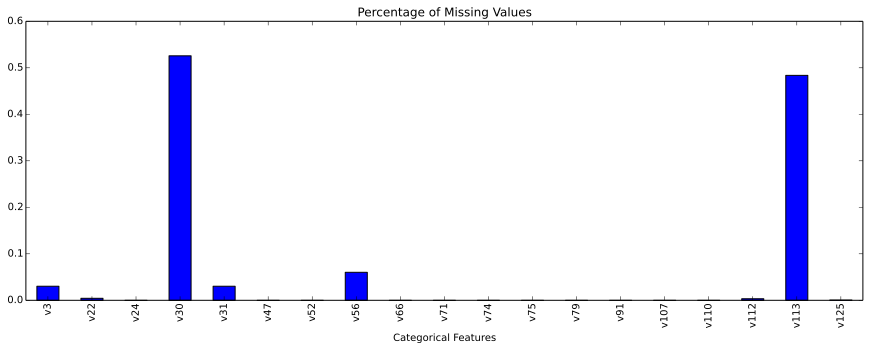

In [21]:
nullvalues = [float((train_char[col].isnull().sum()))/len(train_char[col])
              for col in train_char.columns.values]
percentagenull = list(zip(train_char.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["Categorical Features","percantage of missing value (train)"])
nullplot=nullplot.set_index("Categorical Features")
fig1 = nullplot.plot.bar(figsize =(15,5),title="Percentage of Missing Values", legend=False)
fig2 = fig1.get_figure()
fig2.savefig('plot_de4.pdf')

In [16]:
matrix=[('v22', 0.27246036898786469), ('v50', 0.1341227314604872), ('v56', 0.077021552068485766), ('v113', 0.047390631600842129), ('v66', 0.026274202967796693), ('v10', 0.024800626548556713), ('v62', 0.0204127728604356), ('v129', 0.015596211547007199), ('v110', 0.014464915382831376), ('v47', 0.013316549704030007), ('v79', 0.012971939438583269), ('v12', 0.012859314727069523), ('v114', 0.012279281682455869), ('v14', 0.012254033367936495), ('v21', 0.010139439834421084), ('v40', 0.0093961535860730746), ('v31', 0.0074315551725751255), ('v72', 0.0073395198338131714), ('v34', 0.0069369132083950333), ('v24', 0.0046721152370301864), ('v123', 0.0044150292145425036), ('v124', 0.0039595596558781188), ('v63', 0.0038989215153280498), ('v6', 0.0038672038668661401), ('v25', 0.0038135014181042656), ('v67', 0.0036842241966332859), ('v76', 0.0034820149128700398), ('v88', 0.0034363886373672422), ('v82', 0.0033993908385459861), ('v55', 0.0033732955345472369), ('v104', 0.0033402061276218862), ('v119', 0.0032638816642312782), ('v18', 0.003253733862193063), ('v89', 0.0031334688009212221), ('v43', 0.003082291779179026), ('v94', 0.0030681723246307247), ('v87', 0.0030639078331785685), ('v92', 0.0030120376502252048), ('v68', 0.0030049486533666003), ('v100', 0.0029931935476111308), ('v2', 0.0029078358205218498), ('v69', 0.0028531526959634204), ('v39', 0.0028503546819989936), ('v121', 0.0028223385088264907), ('v130', 0.0028005878125901135), ('v28', 0.0027738957979667883), ('v127', 0.0027591834426055404), ('v4', 0.0027498490268895578), ('v54', 0.0027487588526421613), ('v33', 0.0027424234597847354), ('v86', 0.0027326948873407858), ('v35', 0.0026948596403313166), ('v51', 0.0026212464990891765), ('v16', 0.0026131942277226408), ('v60', 0.0025802963078765491), ('v99', 0.0025770059874932151), ('v37', 0.002571539575950878), ('v27', 0.0025474536405915202), ('v80', 0.0025451331831840779), ('v111', 0.0025385158240683551), ('v73', 0.0025272862559739496), ('v109', 0.0025062569882998475), ('v97', 0.0024994908833831332), ('v102', 0.0024825745557314543), ('v106', 0.0024774748209145268), ('v45', 0.0024633576341211564), ('v30', 0.0024614276985513205), ('v1', 0.0024084141556903063), ('v105', 0.0023983682725974799), ('v126', 0.0023966789112229553), ('v8', 0.0023883046955030505), ('v13', 0.0023857722726982672), ('v108', 0.0023689966613447558), ('v125', 0.0023663773074132236), ('v26', 0.0022957888497323145), ('v116', 0.0022831619447764556), ('v70', 0.0022624880572179725), ('v84', 0.0022322230287652014), ('v58', 0.0022247796888295495), ('v59', 0.0022169451519139577), ('v15', 0.0021970955224783579), ('v78', 0.0021920047671295578), ('v122', 0.0021826014894429971), ('v46', 0.0021820481686703765), ('v48', 0.0021757833358785257), ('v118', 0.0021503673793305104), ('v57', 0.0021325571706890612), ('v83', 0.0021324860422402272), ('v42', 0.0021302067903602624), ('v49', 0.0021091662905452103), ('v9', 0.0021005472323632922), ('v17', 0.002084948446363138), ('v44', 0.0020842341648244556), ('v95', 0.0020681550160112114), ('v115', 0.0020255354784967411), ('v20', 0.0020177773859587989), ('v64', 0.0019942833941368914), ('v98', 0.0019598022370331575), ('v7', 0.0019583969464494824), ('v11', 0.0019462476064677201), ('v112', 0.0019393640734575134), ('v53', 0.0019369147480912292), ('v38', 0.0019351394322977751), ('v5', 0.0019137106001831476), ('v36', 0.0018904929878608607), ('v120', 0.0018794604502320115), ('v101', 0.001875911886879724), ('v96', 0.0018733334475577175), ('v61', 0.0018716809722195142), ('v52', 0.0018289527210380654), ('v117', 0.0017684517339450249), ('v81', 0.0017618974020893869), ('v128', 0.0017539072747824441), ('v131', 0.0017329309349470572), ('v90', 0.0016996648772758765), ('v41', 0.0016970626340750256), ('v77', 0.0016565699926517192), ('v85', 0.00161433043865639), ('v103', 0.0015919123035931701), ('v93', 0.0015504549272426437), ('v65', 0.0015294771144256964), ('v32', 0.0014057761688785677), ('v29', 0.0013967278871378941), ('v19', 0.0012522806072798581), ('v71', 0.00095080629294734022), ('v107', 0.00094644227060599868), ('v23', 0.00087735972230083381), ('v74', 0.00082524805776150348), ('v91', 0.00040750294370770829), ('v75', 0.00031030097435240871), ('v3', 0.00013900029800524555)]

In [17]:
name=[]
value=[]
list1=[]
for i in range (0,10):
    name.append(matrix[i][0])
    value.append(matrix[i][1])
    list1.append(matrix[i])

In [18]:
pd.DataFrame.from_items([('total unique number', value)],
                           orient='index', columns=name)

,v22,v50,v56,v113,v66,v10,v62,v129,v110,v47
total unique number,0.27246,0.134123,0.077022,0.047391,0.026274,0.024801,0.020413,0.015596,0.014465,0.013317


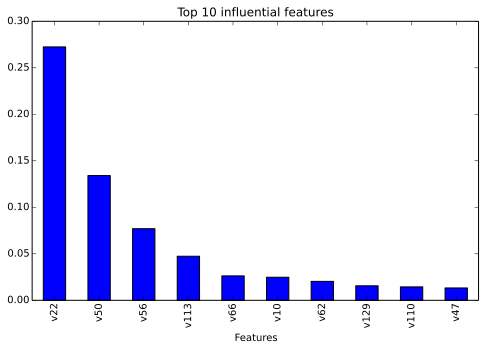

In [22]:
nullplot=pd.DataFrame(data=list1,columns=["Features","Top 10 influential features"])
nullplot=nullplot.set_index("Features")
fig1 = nullplot.plot.bar(figsize =(8,5),title="Top 10 influential features", legend=False)
fig2 = fig1.get_figure()
fig2.savefig('plot_rf1.pdf')